## Problem defination:
>Given clinical parameters wether a person has heart disese or not 

## Data
>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 
The data was later reprocessed for 14 attributes which were important and rest were dropped.
>link: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

## Evaluation
>If 95% reached in prediction accuracy we will pursue the project further 

## Features

###  Data Dictionary

 - age: age in years
 - sex: sex (1 = male; 0 = female)
 - cp: chest pain type
 - -- Value 0: typical angina
 - -- Value 1: atypical angina
 - -- Value 2: non-anginal pain
 - -- Value 3: asymptomatic
 - trestbps: resting blood pressure (in mm Hg on admission to the hospital)
 - chol: serum cholestoral in mg/dl
 - fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 - restecg: resting electrocardiographic results
 - -- Value 0: normal
 - -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 - thalach: maximum heart rate achieved
 - exang: exercise induced angina (1 = yes; 0 = no)
 - oldpeak = ST depression induced by exercise relative to rest
 - slope: the slope of the peak exercise ST segment
 - -- Value 0: upsloping
 - -- Value 1: flat
 - -- Value 2: downsloping
 - ca: number of major vessels (0-3) colored by flourosopy
 - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
 - and the label
 - condition: 0 = no disease, 1 = disease

In [1]:
## Preparing the tools 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import classifers/estimators
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# model evaluations
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



## load data


In [2]:
df= pd.read_csv('data/heart-disease.csv')
df.shape

(303, 14)

## data exploration
learn more about the data and become a subject mater expert background data knowledge

 1. what questions we are solving
 2. what kind of data we have and how to treat different data types
 3. Whats missing and how to deal with it
 4. dealing with outliers
 5. Feature selection


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

plot colours available : https://matplotlib.org/stable/tutorials/colors/colors.html 

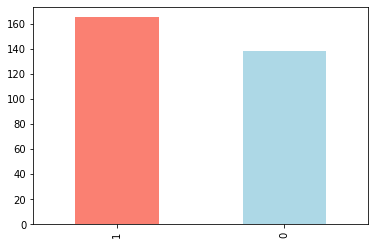

In [6]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# check for any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


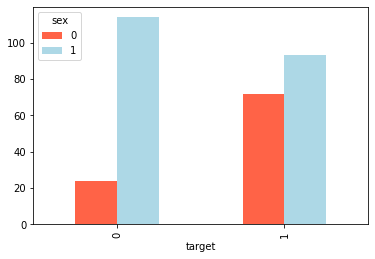

In [11]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=['tomato','lightblue']);

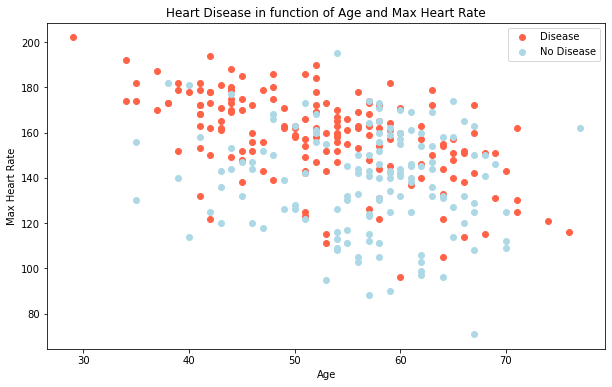

In [12]:
#Create another figure
plt.figure(figsize=(10,6))

# using  positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="tomato") # defining it as a scatter plot

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") 

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

<AxesSubplot:ylabel='Frequency'>

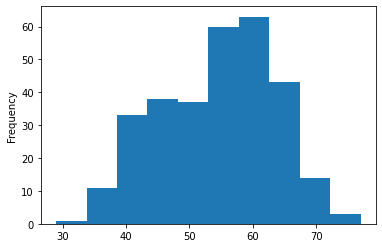

In [13]:
df.age.plot.hist()

### heart disease frequency vs chest pain types
 - cp: chest pain type
 - -- Value 0: typical angina
 - -- Value 1: atypical angina
 - -- Value 2: non-anginal pain
 - -- Value 3: asymptomatic


In [14]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


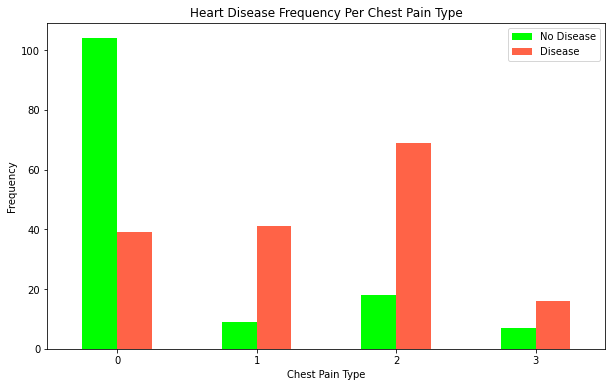

In [15]:
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lime", "tomato"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [16]:
# making corrrelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


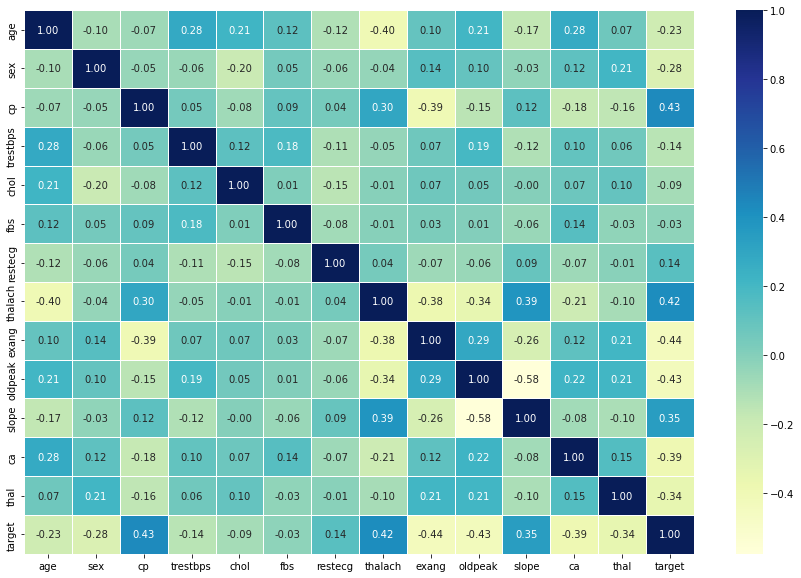

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## converting non- categorical columns to categoricals using LABEL ENCODING

In [64]:
from sklearn.preprocessing import LabelEncoder
# do some label encoding and convert continuous variables and discretes to categories / scaling
df['age'] = LabelEncoder().fit_transform(df['age'])
df['trestbps'] = LabelEncoder().fit_transform(df['trestbps'])
df['chol'] = LabelEncoder().fit_transform(df['chol'])
df['thalach'] = LabelEncoder().fit_transform(df['thalach'])
df['oldpeak'] = LabelEncoder().fit_transform(df['oldpeak'])


In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1


### Splitting the data for training and validation

In [66]:
from sklearn.model_selection import train_test_split
x = df.drop('target',axis = 1)
y = df.target 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape) 

(242, 13)
(61, 13)


In [22]:
y_train.shape

(242,)

### going to try 3 different ML models
 1. logistic regression
 2. k-nearest neighbours classifier
 3. Random Forest Classifier
 4. Naive bayes classifier

In [23]:
# putting models in a dicitonary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'GaussianNB':GaussianNB() }

# Create a function
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """""
    fit and evaluate given ML models
    models: dicitonary caontaining the different scikit models
    x_train: training data  no labels
    x_test : test data no labels
    y_train: train labels 
    y_test : test labels
    """""
    #set random seed
    np.random.seed(42)
    # empty dicitionary to keep model scores
    model_scores = {}
    # looping through 
    for name,model in models.items():
        # fit the model to data
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores
    

In [24]:
scores = fit_and_score(models= models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
scores

C:\Users\DasAn\Desktop\Milestone_Project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.7377049180327869,
 'Random Forest': 0.8360655737704918,
 'GaussianNB': 0.8852459016393442}

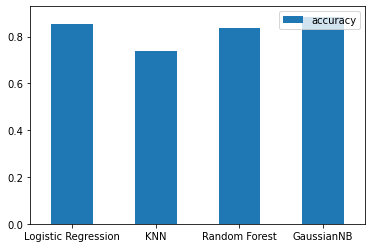

In [25]:
model_compare = pd.DataFrame(scores,index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation = 0);

### baseline is established then go for the following steps
 * Hyperparameter tuning
 * Feature Importance
 * Confusion Matrix
 * cross-validation
### metrics
* Precision
* recall
* f1 score
* classification report
* ROC curve
* Area under the curve
    
    

## Hyper-parameter tuning 

Maximum KNN  score on test data: 80.33%


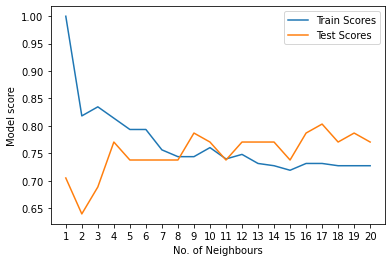

In [26]:
# tuning knn classifiers
train_scores = []
test_scores = []
# creaing a list of neighbours
neighbors = range(1,21)
knn= KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    
plt.plot(neighbors,train_scores,label ='Train Scores')
plt.plot(neighbors,test_scores,label ='Test Scores')
plt.xticks(np.arange(1, 21, step=1)) 
plt.xlabel('No. of Neighbours')
plt.xlabel
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN  score on test data: {max(test_scores)*100:.2f}%')


* discarding knn since even after hyper tuning the parameters the accuracy was below the logistic regression, random forest classifiers and naive_bayes. 

# hyper parameter tuning using randomized search cv

tune 
 * logistic regression()
 * randomforestclassifier()
 * GaussianNB()

 * info on classifier tuning :https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [28]:
np.logspace(-4,4,20) # checking the log space command


array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [31]:
# create hyper parameters for logistic regeression
log_reg_grid = {'C':np.logspace(-4,4,300),
               'solver': ['liblinear']}

# create hyper parameters for random forest classifier
rf_grid = {'n_estimators' : np.arange(10,1000,50),
           'max_depth' : [None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}
# create hyper parameters for Naive_bayes classifier
gnb_grid = {'var_smoothing': np.logspace(9,-9, num=300)}

In [32]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=10,
                               n_iter = 30,
                               verbose=True)

rs_log_reg.fit(x_train,y_train)
print(rs_log_reg.best_params_)
print(rs_log_reg.score(x_test,y_test))



Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'solver': 'liblinear', 'C': 1.1665131316981963}
0.8688524590163934


In [33]:
np.random.seed(42)
rs_rf_clf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv=10,
                               n_iter = 30,
                               verbose=True)

rs_rf_clf.fit(x_train,y_train)
print(rs_rf_clf.best_params_)
print(rs_rf_clf.score(x_test,y_test))


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_estimators': 310, 'min_samples_split': 2, 'min_samples_leaf': 19, 'max_depth': 5}
0.8688524590163934


In [34]:
np.random.seed(42)
rs_gnb_clf = RandomizedSearchCV(GaussianNB(),
                               param_distributions = gnb_grid,
                               cv=10,
                               n_iter = 30,
                               verbose=True)

rs_gnb_clf.fit(x_train,y_train)
print(rs_gnb_clf.best_params_)
print(rs_gnb_clf.score(x_test,y_test))


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'var_smoothing': 7.520629269592392e-05}
0.8852459016393442


## Hyperparameter tuning for Logistic regression and naive bays using grid search cv

In [35]:
np.random.seed(42)
log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver': ['lbfgs','newton-cg','liblinear'],
               'max_iter' : [1500]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train,y_train)
print(gs_log_reg.best_params_)
print(gs_log_reg.score(x_test,y_test))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 0.615848211066026, 'max_iter': 1500, 'solver': 'lbfgs'}
0.8688524590163934


In [37]:
np.random.seed(42)
gs_gnb_grid = {'var_smoothing': np.logspace(9,-9,60)}
gs_gnb = GridSearchCV(    GaussianNB(),
                          param_grid=gs_gnb_grid,
                          cv=5,
                          verbose=True)

gs_gnb.fit(x_train,y_train)
print(gs_gnb.best_params_)
print(gs_gnb.score(x_test,y_test))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'var_smoothing': 1.8671810912919168e-05}
0.8852459016393442


In [38]:
log_reg_y_preds = gs_log_reg.predict(x_test)
gnb_y_preds = gs_gnb.predict(x_test)


None None


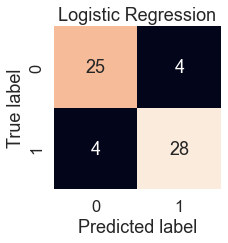

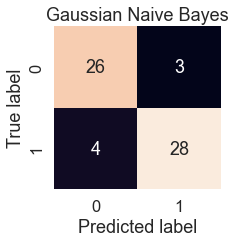

In [116]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds, title):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis
    plt.title(title)
#call the function     
print(plot_conf_mat(y_test, log_reg_y_preds,"Logistic Regression"),plot_conf_mat(y_test, gnb_y_preds,"Gaussian Naive Bayes"))


### ROC curve for logistic Regression

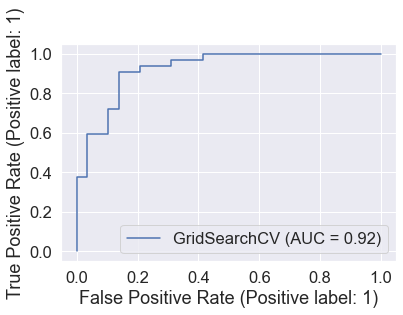

In [33]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)

### Plot ROC curve for Gaussian Naive bayes

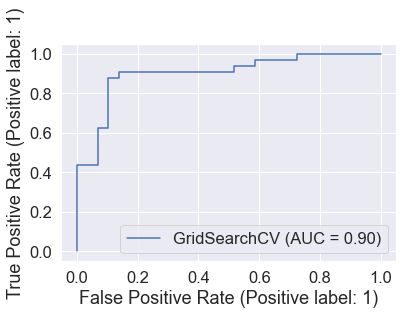

In [43]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_gnb,x_test,y_test)

#### classification report for Logistic Regression

In [44]:
print(classification_report(y_test,log_reg_y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



#### classification report for GaussianNB

In [45]:
print(classification_report(y_test,gnb_y_preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



* From the above reports the gaussian naive bayes algorithm perfoms slightly better than logistic regression, to further check the robustness perfroming crossvalidation scores

In [92]:
# making a report based on cross val scores 
gs_log_reg.best_params_

{'C': 0.615848211066026, 'max_iter': 1500, 'solver': 'lbfgs'}

In [93]:
gs_gnb.best_params_

{'var_smoothing': 1.8671810912919168e-05}

In [98]:
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = GaussianNB(var_smoothing=1.8671810912919168e-05)
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_gnb = np.mean(cv_acc)

# Cross-validated precision score
cv_precision_gnb = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
# Cross-validated recall score
cv_recall_gnb = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
# Cross-validated F1 score
cv_f1_gnb = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring


print(f'cv accuracy gnb: {cv_acc_gnb}')
print(f'cv precison gnb: {cv_precision_gnb}')
print(f'cv recall gnb: {cv_recall_gnb}')
print(f'cv f1_score gnb: {cv_f1_gnb}')



cv accuracy gnb: 0.8116939890710382
cv precison gnb: 0.8177638653084325
cv recall gnb: 0.8484848484848484
cv f1_score gnb: 0.8316931403490786


In [99]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C= 0.615848211066026, max_iter= 1500, solver= 'lbfgs')
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_LR = np.mean(cv_acc)

# Cross-validated precision score
cv_precision_LR = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
# Cross-validated recall score
cv_recall_LR = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
# Cross-validated F1 score
cv_f1_LR = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring


print(f'cv accuracy logistic regression: {cv_acc_LR}')
print(f'cv precison logistic regression: {cv_precision_LR}')
print(f'cv recall logistic regression: {cv_recall_LR}')
print(f'cv f1_score logistic regression: {cv_f1_LR}')

cv accuracy logistic regression: 0.8282513661202187
cv precison logistic regression: 0.8156701353760176
cv recall logistic regression: 0.8909090909090909
cv f1_score logistic regression: 0.8506531565619685


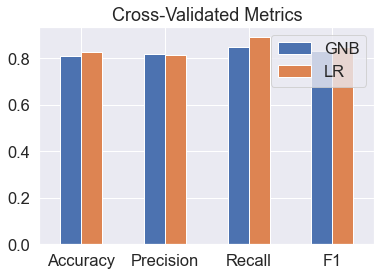

In [109]:
# Visualizing cross-validated metrics
cv_metrics_gnb = pd.DataFrame({"Accuracy": [cv_acc_gnb,cv_acc_LR],
                            "Precision": [cv_precision_gnb,cv_precision_LR],
                            "Recall": [cv_recall_gnb,cv_recall_LR],
                            "F1": [cv_f1_gnb,cv_f1_LR]},
                          index=['GNB','LR'])

cv_metrics_gnb.T.plot.bar(title="Cross-Validated Metrics", legend=True)
plt.xticks(rotation = 0);

In [110]:
cv_metrics_gnb

,Accuracy,Precision,Recall,F1
GNB,0.811694,0.817764,0.848485,0.831693
LR,0.828251,0.815670,0.890909,0.850653


Logistic regression is more robust when compared with the naive bayes model although the classification report showed the other way around. 

## Feature importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?" It can be seen that the Logistic Regression is better in terms of cross validation accuracy so considering logistic regression for feature importance, also clf variable is currently set to logisitic regression model.

for logistic regression problems we use coef_ attribute to do feature importance ... this is different for each models

In [111]:
# first need to fit data in the new classifier variable created ...since cross_val_score does this itself
clf.fit(x_train, y_train);

In [112]:
clf.coef_

array([[-0.00768899, -1.29857164,  0.76447949, -0.02072327, -0.00649331,
         0.1359739 ,  0.41294628,  0.01890711, -0.87407855, -0.0716575 ,
         0.57149679, -0.76033822, -0.87406588]])

In [113]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': -0.007688986197035952,
 'sex': -1.298571639956233,
 'cp': 0.76447948799965,
 'trestbps': -0.02072327072732227,
 'chol': -0.006493313334714646,
 'fbs': 0.13597390195825326,
 'restecg': 0.41294627866656564,
 'thalach': 0.01890710613758184,
 'exang': -0.8740785509199097,
 'oldpeak': -0.07165749607934982,
 'slope': 0.5714967938242023,
 'ca': -0.7603382241466738,
 'thal': -0.874065881648803}

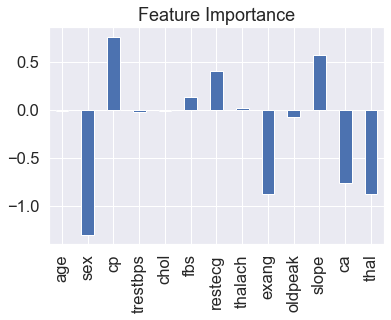

In [114]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

#### What next 
* Getting more data if possible 
* try to tune other classification algorithms
* Try extremely randomized trees ensemble models, cat boost, xg boost